In [196]:
#load libraries & packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plot


In [2]:
#load the movie replication data data 
df =pd.read_csv('movieReplicationSet.csv')
df.shape

(1097, 477)

# 1) What is the relationship between sensation seeking and movie experience?

In [3]:
#sensation = df.iloc[:,400:420].dropna()
#personality = df.iloc[:,420:464].dropna()
#experience = df.iloc[:,464:474].dropna()
data = df.iloc[:,np.r_[400:420, 464:474]].dropna()
sensation = data.iloc[:,0:20]
experience = data.iloc[:,20:31]


In [5]:
zscoreds = stats.zscore(sensation)
pcas = PCA().fit(zscoreds)
eigVals = pcas.explained_variance_
loadings = pcas.components_
rotatedDatas = pcas.fit_transform(zscoreds)
covarExplaineds = eigVals/sum(eigVals)*100
threshold = 1
print('Number of factors selected by Kaiser criterion:', np.count_nonzero(eigVals > threshold))

Number of factors selected by Kaiser criterion: 6


In [6]:
zscored2 = stats.zscore(experience)
pca2 = PCA().fit(zscored2)
eigVal2 = pca2.explained_variance_
loading2 = pca2.components_
rotatedData2 = pca2.fit_transform(zscored2)
covarExplaineds = eigVal2/sum(eigVal2)*100
threshold = 1
print('Number of factors selected by Kaiser criterion:', np.count_nonzero(eigVal2 > threshold))

Number of factors selected by Kaiser criterion: 2


In [7]:
rotatedData2[:,0]*-1

array([-0.70301924,  0.08435803, -1.76230242, ..., -1.41664741,
        1.33927528, -0.1504651 ])

In [8]:
rotatedDatas[:,0]*-1

array([0.41507546, 1.25840504, 1.85639404, ..., 1.12191819, 1.79153027,
       1.33529324])

In [26]:
X = np.column_stack((rotatedDatas[:,0]*-1,rotatedDatas[:,1]*-1,rotatedDatas[:,2]*-1
                    ,rotatedDatas[:,3]*-1,rotatedDatas[:,4]*-1,rotatedDatas[:,5]*-1
                    ))
y = np.column_stack((rotatedData2[:,0]*-1,rotatedData2[:,1]*-1))

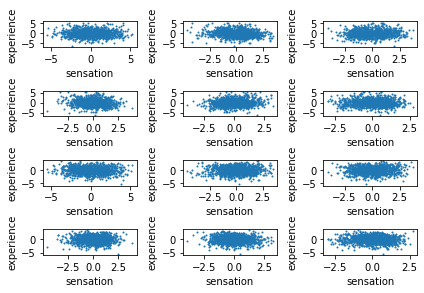

In [10]:
subnum = 1 
for i in range(2):
    for j in range(6):
        plt.subplot(4,3,subnum) 
        subnum+=1
        plt.plot(rotatedDatas[:,j]*-1,rotatedData2[:,i]*-1,'o',markersize=1)
        plt.xlabel('sensation')
        plt.ylabel('experience')
        plt.tight_layout()
        

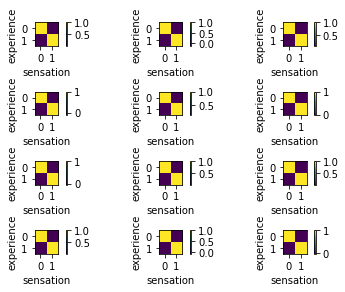

In [393]:
subnum = 1 
for i in range(2):
    for j in range(6):
        plt.subplot(4,3,subnum) 
        corr = np.corrcoef(rotatedDatas[:,j]*-1,rotatedData2[:,i]*-1)
        subnum+=1
        plt.imshow(corr) 
        plt.xlabel('sensation')
        plt.ylabel('experience')
        plt.colorbar()
        plt.tight_layout()



In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
intercept, coefficients = model.intercept_, model.coef_
print(intercept, coefficients)



[ 6.44008844e-17 -2.40536707e-17] [[ 0.0114716  -0.16977571  0.10796729 -0.17535865  0.22242946 -0.03385502
   0.06058904]
 [-0.03250226  0.02956891  0.04583709  0.01044365 -0.07467256 -0.04299885
   0.0630107 ]]


# 2) Is there evidence of personality types based on the data of these research participants? If so, characterize these types both quantitatively and narratively.  

In [42]:
personality = df.iloc[:,420:464].dropna()


In [43]:
personality.shape

(1000, 44)

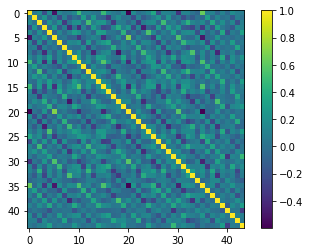

In [44]:
r = np.corrcoef(personality,rowvar=False)
plt.imshow(r) 
plt.colorbar()
plt.show()

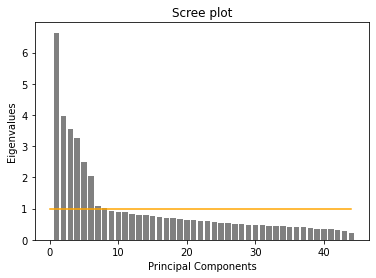

Number of factors selected by Kaiser criterion: 8


In [45]:
# Z-score the data:
zscoredData3 = stats.zscore(personality)

# Initialize PCA object and fit to our data:
pca3 = PCA().fit(zscoredData3)

# Eigenvalues: Single vector of eigenvalues in decreasing order of magnitude
eigVals3 = pca3.explained_variance_

# Loadings (eigenvectors): Weights per factor in terms of the original data.
loadings3 = pca3.components_*-1

# Rotated Data - simply the transformed data:
rotatedData3 = pca3.fit_transform(zscoredData3)*-1

# Scree plot:
numPredictors = 44
plt.bar(np.linspace(1,numPredictors,numPredictors),eigVals3,color='gray')
plt.title('Scree plot')
plt.plot([0,numPredictors],[1,1],color='orange') # Orange Kaiser criterion line for the fox
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.show()
threshold = 1
print('Number of factors selected by Kaiser criterion:', np.count_nonzero(eigVals3 > threshold))


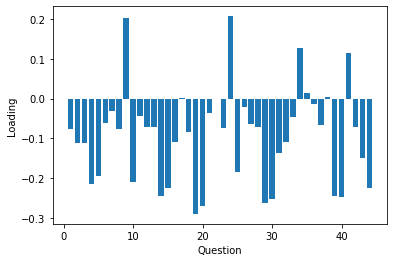

In [47]:
numClasses = 44
x = np.linspace(1,numClasses,numClasses)
whichPrincipalComponent = 1 # Select and look at once factor at a time 
plt.bar(x,loadings3[whichPrincipalComponent,:]*-1) # note: eigVecs multiplied by -1
plt.xlabel('Question')
plt.ylabel('Loading')
plt.show() # Show bar plot

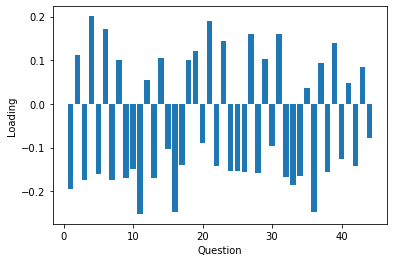

In [48]:
whichPrincipalComponent = 0 # Select and look at once factor at a time 
plt.bar(x,loadings3[whichPrincipalComponent,:]*-1) # note: eigVecs multiplied by -1
plt.xlabel('Question')
plt.ylabel('Loading')
plt.show() # Show bar plot

In [52]:
for i in range(44):
    
    print(i+1,list(personality.columns)[i])


1 Is talkative
2 Tends to find fault with others
3 Does a thorough job
4 Is depressed/Blue
5 Is original/comes up with new ideas
6 Is reserved
7 Is helpful and unselfish with others
8 Can be somewhat careless
9 Is relaxed/handles stress well
10 Is curious about many different things
11 Is full of energy
12 Starts quarrels with others
13 Is a reliable worker
14 Can be tense
15 Is ingenious/a deep thinker
16 Generates a lot of Enthusiasm
17 Has a forgiving nature
18 Tends to be disorganized
19 Worries a lot
20 Has an active imagination
21 Tends to be quiet
22 Is generally trusting
23 Tends to be lazy
24 Is emotionally stable/not easily upset
25 is inventive
26 Has an assertive personality
27 Can be cold and aloof
28 Perseveres until the task is finished
29 Can be moody
30 Values artistic/aesthetic experiences
31 Is sometimes shy/inhibited
32 Is considerate and kind to almost everyone
33 Does things efficiently
34 Remains calm in tense situations
35 Prefers work that is routine
36 is outg

In [53]:
# Store our transformed as x:
x = np.column_stack((rotatedData3[:,0],rotatedData3[:,1]))

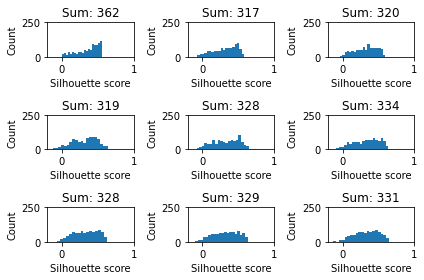

In [54]:
# Init:
numClusters = 9 # how many clusters are we looping over? (from 2 to 10)
Q = np.empty([numClusters,1])*np.NaN # init container to store sums

# Compute kMeans:
for ii in range(2, 11): # Loop through each cluster (from 2 to 10!)
    kMeans = KMeans(n_clusters = int(ii)).fit(x) # compute kmeans using scikit
    cId = kMeans.labels_ # vector of cluster IDs that the row belongs to
    cCoords = kMeans.cluster_centers_ # coordinate location for center of each cluster
    s = silhouette_samples(x,cId) # compute the mean silhouette coefficient of all samples
    Q[ii-2] = sum(s) # take the sum
    # Plot data:
    plt.subplot(3,3,ii-1) 
    plt.hist(s,bins=20) 
    plt.xlim(-0.2,1)
    plt.ylim(0,250)
    plt.xlabel('Silhouette score')
    plt.ylabel('Count')
    plt.title('Sum: {}'.format(int(Q[ii-2]))) # sum rounded to nearest integer
    plt.tight_layout() # adjusts subplot padding

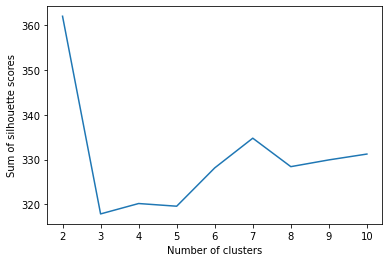

In [55]:
plt.plot(np.linspace(2,10,9),Q)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of silhouette scores')
plt.show()

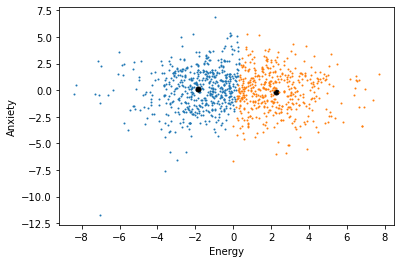

In [57]:
# Recompute kMeans:
numClusters = 2
kMeans = KMeans(n_clusters = numClusters).fit(x) 
cId = kMeans.labels_ 
cCoords = kMeans.cluster_centers_ 

# Plot the color-coded data:
for ii in range(numClusters):
    plotIndex = np.argwhere(cId == int(ii))
    plt.plot(x[plotIndex,0],x[plotIndex,1],'o',markersize=1)
    plt.plot(cCoords[int(ii-1),0],cCoords[int(ii-1),1],'o',markersize=5,color='black')  
    plt.xlabel('Energy')
    plt.ylabel('Anxiety')
    

# 3) Are movies that are more popular rated higher than movies that are less popular?

In [ ]:
#null: not rated higher 

In [3]:
dataframe = np.genfromtxt('movieReplicationSet.csv', delimiter = ',', skip_header = 1)
moviedf = df.iloc[:,0:400]

In [6]:
movie = dataframe[:,0:400]

In [8]:
np.median(moviedf.iloc[:,0].dropna())

2.5

In [9]:
ratingNum  = np.count_nonzero(~np.isnan(movie), axis=0)
median_rating = np.median(ratingNum)
low_popular =ratingNum[ratingNum <= median_rating]


In [12]:
median_rating

197.5

In [13]:
dfmovie = pd.DataFrame({'num':ratingNum})
l = np.zeros(400)
med = np.zeros(400)
for i,j in enumerate(dfmovie['num']):
    if j <= median_rating:
        l[i]=0
    else:
        l[i]=1
for i in range(0,400):
    med[i]=np.median(moviedf.iloc[:,i].dropna())

In [18]:
dfmovie['popularity'] = l
dfmovie['median'] = med

In [19]:
dfmovie = dfmovie.sort_values(by =['popularity'],ignore_index = True)

In [20]:
t1,p1 = stats.ttest_ind(dfmovie['median'][0:200],dfmovie['median'][200:400])
t1,p1

(-15.201437160541866, 1.7827864584605934e-41)

In [24]:
from scipy.stats import mannwhitneyu

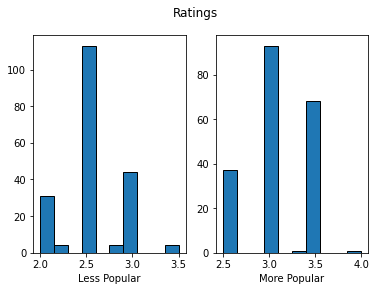

In [32]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Ratings')
ax1.hist(dfmovie['median'][0:200], bins=10, histtype='bar', ec='black') 
ax2.hist(dfmovie['median'][200:400], bins=10, histtype='bar', ec='black') 
ax1.set_xlabel("Less Popular")
ax2.set_xlabel("More Popular")
plt.show()

In [27]:
U1, p1 = mannwhitneyu(dfmovie['median'][0:200], dfmovie['median'][200:400], alternative='less')
U1,p1

(6572.5, 9.929258851707232e-35)

# 4)Is enjoyment of ‘Shrek (2001)’ gendered, i.e. do male and female viewers rate it differently?

In [33]:
df['Shrek (2001)']

0       3.0
1       3.0
2       3.5
3       0.5
4       3.0
       ... 
1092    3.0
1093    4.0
1094    3.5
1095    2.5
1096    2.0
Name: Shrek (2001), Length: 1097, dtype: float64

In [46]:
dfshrek = pd.DataFrame({'rate':df['Shrek (2001)'],'gender':df.iloc[:,474]}).dropna()
dfshrek = dfshrek.sort_values(by =['gender'],ignore_index = True)
female = dfshrek[dfshrek.iloc[:,1]==1] 
male = dfshrek[dfshrek.iloc[:,1]==2]
self = dfshrek[dfshrek.iloc[:,1]==3]
U2, p2 = mannwhitneyu(male['rate'], female['rate'], alternative='two-sided')

U2, p2

(82232.5, 0.050536625925559006)

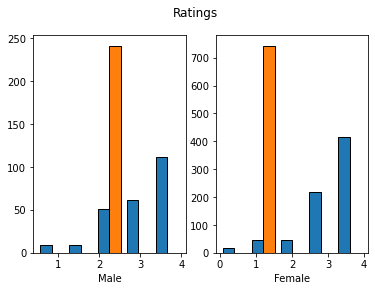

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Ratings')
ax1.hist(male, bins=5, histtype='bar', ec='black') 
ax2.hist(female, bins=5, histtype='bar', ec='black') 
ax1.set_xlabel("Male")
ax2.set_xlabel("Female")
plt.show()

# 5) Do people who are only children enjoy ‘The Lion King (1994)’ more than people with siblings? 

In [241]:
df.iloc[:,475]

0       0
1       0
2       1
3       0
4       1
       ..
1092    0
1093    0
1094    0
1095    0
1096    0
Name: Are you an only child? (1: Yes; 0: No; -1: Did not respond), Length: 1097, dtype: int64

In [47]:
dflion = pd.DataFrame({'rate':df['The Lion King (1994)'],'children':df.iloc[:,475]}).dropna()
onlychild = dflion[dflion.iloc[:,1]==1] 
sibling = dflion[dflion.iloc[:,1]==0]
U3, p3 = mannwhitneyu(sibling['rate'], onlychild['rate'], alternative='less')
U3, p3

(64247.0, 0.978419092554931)

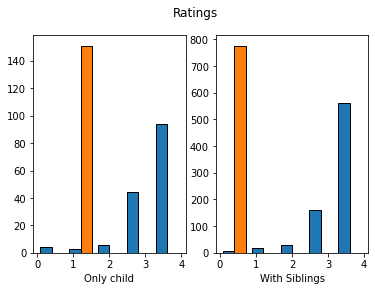

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Ratings')
ax1.hist(onlychild, bins=5, histtype='bar', ec='black') 
ax2.hist(sibling, bins=5, histtype='bar', ec='black') 
ax1.set_xlabel("Only child")
ax2.set_xlabel("With Siblings")
plt.show()

# 6）Do people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than those who prefer to watch them alone? 

In [246]:
df['The Wolf of Wall Street (2013)']

0       NaN
1       NaN
2       NaN
3       4.0
4       3.0
       ... 
1092    NaN
1093    3.5
1094    2.0
1095    NaN
1096    4.0
Name: The Wolf of Wall Street (2013), Length: 1097, dtype: float64

In [49]:
dfwall = pd.DataFrame({'rate':df['The Wolf of Wall Street (2013)'],'alone':df.iloc[:,476]}).dropna()
alone = dfwall[dfwall.iloc[:,1]==1] 
socially = dfwall[dfwall.iloc[:,1]==0]
U3, p3 = mannwhitneyu(alone['rate'], socially['rate'], alternative='less')
U3, p3

(56806.5, 0.9436657996253056)

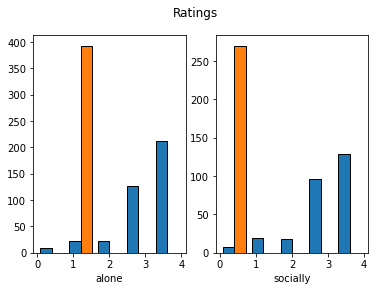

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Ratings')
ax1.hist(alone, bins=5, histtype='bar', ec='black') 
ax2.hist(socially, bins=5, histtype='bar', ec='black') 
ax1.set_xlabel("alone")
ax2.set_xlabel("socially")
plt.show()

# 7) There are ratings on movies from several franchises ([‘Star Wars’, ‘Harry Potter’, ‘The Matrix’, ‘Indiana Jones’, ‘Jurassic Park’, ‘Pirates of the Caribbean’, ‘Toy Story’, ‘Batman’]) in this dataset. How many of these are of inconsistent quality, as experienced by viewers?

In [285]:
#null: there is no inconsistent quality for the franchise 

In [57]:
franchise_name = (['Star Wars', 'Harry Potter', 'The Matrix', 'Indiana Jones', 'Jurassic Park', 'Pirates of the Caribbean', 'Toy Story', 'Batman'])

In [58]:
starwars = df.filter(regex=franchise_name[0]).dropna()
stats.kruskal(starwars.iloc[:,0], starwars.iloc[:,1], starwars.iloc[:,2],starwars.iloc[:,3],starwars.iloc[:,4],starwars.iloc[:,5])

KruskalResult(statistic=193.51026675400544, pvalue=6.940162236984522e-40)

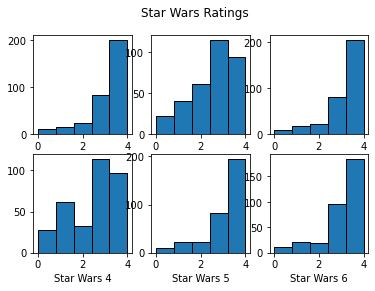

In [72]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3)
fig.suptitle('Star Wars Ratings')
ax1.hist(starwars.iloc[:,0], bins=5, histtype='bar', ec='black') 
ax2.hist(starwars.iloc[:,1], bins=5, histtype='bar', ec='black') 
ax3.hist(starwars.iloc[:,2], bins=5, histtype='bar', ec='black') 
ax4.hist(starwars.iloc[:,3], bins=5, histtype='bar', ec='black') 
ax5.hist(starwars.iloc[:,4], bins=5, histtype='bar', ec='black') 
ax6.hist(starwars.iloc[:,5], bins=5, histtype='bar', ec='black') 
ax1.set_xlabel("Star Wars 1")
ax2.set_xlabel("Star Wars 2")
ax3.set_xlabel("Star Wars 3")
ax4.set_xlabel("Star Wars 4")
ax5.set_xlabel("Star Wars 5")
ax6.set_xlabel("Star Wars 6")
plt.show()

In [59]:
harry_porter = df.filter(regex=franchise_name[1]).dropna()
harry_porter.shape
stats.kruskal(harry_porter.iloc[:,0], harry_porter.iloc[:,1], harry_porter.iloc[:,2],harry_porter.iloc[:,3])


KruskalResult(statistic=5.8739552218536755, pvalue=0.11790622831256074)

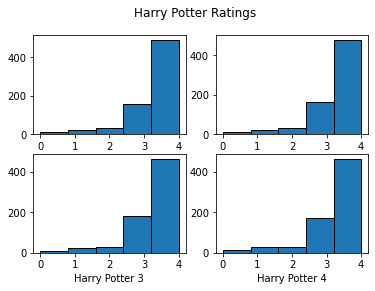

In [74]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
fig.suptitle('Harry Potter Ratings')
ax1.hist(harry_porter.iloc[:,0], bins=5, histtype='bar', ec='black') 
ax2.hist(harry_porter.iloc[:,1], bins=5, histtype='bar', ec='black') 
ax3.hist(harry_porter.iloc[:,2], bins=5, histtype='bar', ec='black') 
ax4.hist(harry_porter.iloc[:,3], bins=5, histtype='bar', ec='black') 
ax1.set_xlabel("Harry Potter 1")
ax2.set_xlabel("Harry Potter 2")
ax3.set_xlabel("Harry Potter 3")
ax4.set_xlabel("Harry Potter 4")

plt.show()

In [60]:
matrix = df.filter(regex=franchise_name[2]).dropna()
matrix.shape
stats.kruskal(matrix.iloc[:,0], harry_porter.iloc[:,1], harry_porter.iloc[:,2])


KruskalResult(statistic=87.21270702814837, pvalue=1.1534566917108259e-19)

In [61]:
indiana = df.filter(regex=franchise_name[3]).dropna()
indiana.shape
stats.kruskal(indiana.iloc[:,0], indiana.iloc[:,1], indiana.iloc[:,2],indiana.iloc[:,3])


KruskalResult(statistic=54.19395477406098, pvalue=1.020118354785894e-11)

In [62]:
jurassic = df.filter(regex=franchise_name[4]).dropna()
jurassic.shape
stats.kruskal(jurassic.iloc[:,0], jurassic.iloc[:,1], jurassic.iloc[:,2])

KruskalResult(statistic=49.42733030275783, pvalue=1.8492328391686058e-11)

In [63]:
pirates = df.filter(regex=franchise_name[5]).dropna()
stats.kruskal(pirates.iloc[:,0], pirates.iloc[:,1], pirates.iloc[:,2])


KruskalResult(statistic=6.660021086485515, pvalue=0.035792727694248905)

In [64]:
toy = df.filter(regex=franchise_name[6]).dropna()
stats.kruskal(toy.iloc[:,0], toy.iloc[:,1], toy.iloc[:,2])


KruskalResult(statistic=23.496729938969775, pvalue=7.902234665149812e-06)

In [65]:
batman = df.filter(regex = franchise_name[7]).dropna()
batman.shape
stats.kruskal(batman.iloc[:,0], batman.iloc[:,1], batman.iloc[:,2])


KruskalResult(statistic=84.65778425637279, pvalue=4.1380499020034183e-19)

# 8) Build a prediction model of your choice (regression or supervised learning) to predict movie ratings (for all 400 movies) from personality factors only. Make sure to use cross-validation methods to avoid overfitting and characterize the accuracy of your model.

In [198]:
df3 = df.copy()

In [199]:
for i in range (len(df3.columns)):
    df3.iloc[:,i] = df3.iloc[:,i].fillna(df3.iloc[:,i].median())

In [205]:
dfmovie = df3.iloc[:,0:400]

In [206]:
dfperson = df3.iloc[:,420:464]

In [207]:
dfmovie = dfmovie.to_numpy()
dfperson = dfperson.to_numpy()

In [214]:
x_train, x_test, y_train, y_test = train_test_split(dfperson,
                                                    dfmovie,
                                                    test_size = 0.2,
                                                    random_state=42)

In [215]:
regress = LinearRegression().fit(x_train, y_train)
y_pred = regress.predict(x_test)
print('R-squared', metrics.r2_score(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-squared -0.029395362583722443
RMSE 0.5421308607920942


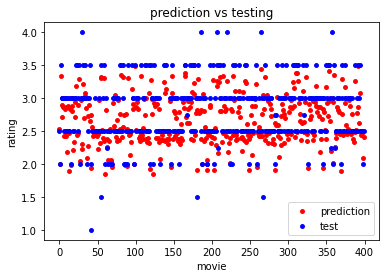

In [217]:
plot.scatter(range(400), y_pred[0], color = 'red',s = 15.0,label='prediction')
plot.scatter(range(400), y_test[0], color = 'blue',s = 15.0,label='test')
plot.title('prediction vs testing')
plot.xlabel('movie')
plot.ylabel('rating')
plt.legend(loc='lower right')
plot.show()

#  9)Build a prediction model of your choice (regression or supervised learning) to predict movie ratings (for all 400 movies) from gender identity, sibship status and social viewing preferences (columns 475-477) only. Make sure to use cross-validation methods to avoid overfitting and characterize the accuracy of your model.

In [218]:
dfgender = df3.iloc[:,475:477]

In [219]:
x_train, x_test, y_train, y_test = train_test_split(dfgender,
                                                    dfmovie,
                                                    test_size = 0.2,
                                                    random_state=42)

In [220]:
regress = LinearRegression().fit(x_train, y_train)
y_pred = regress.predict(x_test)
print('R-squared', metrics.r2_score(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-squared -0.005473102279012929
RMSE 0.5368228927425293


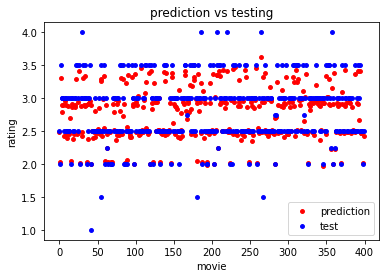

In [221]:
plot.scatter(range(400), y_pred[0], color = 'red',s = 15.0,label='prediction')
plot.scatter(range(400), y_test[0], color = 'blue',s = 15.0,label='test')
plot.title('prediction vs testing')
plot.xlabel('movie')
plot.ylabel('rating')
plt.legend(loc='lower right')
plot.show()

# 10)Build a prediction model of your choice (regression or supervised learning) to predict movie ratings (for all 400 movies) from all available factors that are not movie ratings (columns 401-477). Make sure to use cross-validation methods to avoid overfitting and characterize the accuracy of your model.


In [114]:
dfother = df3.iloc[:,400:477]

In [115]:
dfmovie = dfmovie.to_numpy()
dfother = dfother.to_numpy()

In [148]:
from sklearn.model_selection import train_test_split # import sklearn to split data
from sklearn.linear_model import LinearRegression # import linear regression
from sklearn import metrics # import metrics 
x_train, x_test, y_train, y_test = train_test_split(dfother,
                                                    dfmovie,
                                                    test_size = 0.2,
                                                    random_state=42)

In [124]:
regress = LinearRegression().fit(x_train, y_train)
y_pred = regress.predict(x_test)
print('R-squared', metrics.r2_score(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-squared -0.06318013866943187
RMSE 0.5501453678300884


In [119]:
x_train.shape

(877, 77)

In [128]:
y_train.shape

(877, 400)

In [129]:
regress = LinearRegression().fit(x_train, y_train)
#print intercept and coefficient
#print('Intercept', regress.intercept_) # Print the intercept
#print('Coefficient', regress.coef_)

In [83]:
intercept = regress.intercept_
intercept.shape

(400,)

In [84]:
coefficient = regress.coef_
coefficient.shape

(400, 77)

In [130]:
from sklearn import metrics
y_pred = regress.predict(x_test)
print('R-squared', metrics.r2_score(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-squared -0.005473102279012929
RMSE 0.5368228927425293


In [173]:
y_pred[0].shape

(400,)

In [156]:
y_test.shape

(220, 400)

In [161]:
len(y_test)

220

In [155]:
x_test.shape

(220, 77)

In [ ]:
y_pred[0]

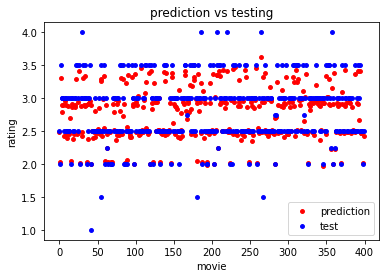

In [197]:
plot.scatter(range(400), y_pred[0], color = 'red',s = 15.0,label='prediction')
plot.scatter(range(400), y_test[0], color = 'blue',s = 15.0,label='test')
plot.title('prediction vs testing')
plot.xlabel('movie')
plot.ylabel('rating')
plt.legend(loc='lower right')#set the legend position
plot.show()